# Regresión Lineal Múltiple 

In [5]:
#Librerias 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [6]:
#Leer los datos
df = pd.read_csv("Tarea_RegresionMultiple.csv")
df.head()

,Unnamed: 0,X1,X2,y
0,0,0.038076,0.061696,151.0
1,1,-0.001882,-0.051474,75.0
2,2,0.085299,0.044451,141.0
3,3,-0.089063,-0.011595,206.0
4,4,0.005383,-0.036385,135.0


In [7]:
X1 = df["X1"].values
X2 = df["X2"].values
y = df["y"].values

In [8]:
# Construir matriz X con bias
X = np.column_stack((np.ones(len(X1)), X1, X2))

# Inicializar parámetros
theta = np.zeros(3)

# Hiperparámetros
alpha = 0.0001
n_iter = 1000
m = len(y)

# Lista para guardar el error
cost_history = []

# Descenso de gradiente
for i in range(n_iter):
    y_pred = X @ theta
    error = y_pred - y
    
    cost = (1/(2*m)) * np.sum(error**2)
    cost_history.append(cost)
    
    gradient = (1/m) * (X.T @ error)
    theta = theta - alpha * gradient

print("Parámetros aprendidos:", theta)


Parámetros aprendidos: [14.47810348  0.06880743  0.21477865]


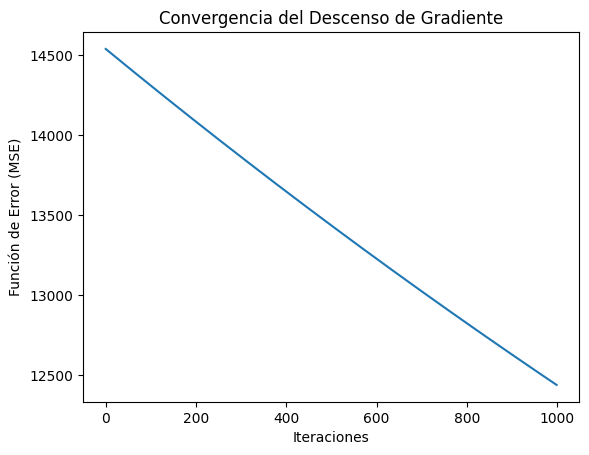

In [9]:
plt.figure()
plt.plot(cost_history)
plt.xlabel("Iteraciones")
plt.ylabel("Función de Error (MSE)")
plt.title("Convergencia del Descenso de Gradiente")
plt.show()


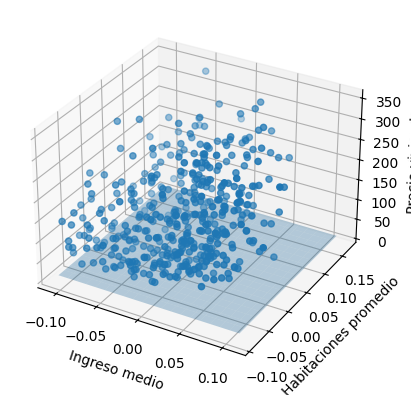

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X1, X2, y)

# Crear malla
x1_surf, x2_surf = np.meshgrid(
    np.linspace(X1.min(), X1.max(), 20),
    np.linspace(X2.min(), X2.max(), 20)
)

y_surf = theta[0] + theta[1]*x1_surf + theta[2]*x2_surf

ax.plot_surface(x1_surf, x2_surf, y_surf, alpha=0.3)

ax.set_xlabel("Ingreso medio")
ax.set_ylabel("Habitaciones promedio")
ax.set_zlabel("Precio vivienda")

plt.show()


### Usando scikit learn

In [11]:
from sklearn.linear_model import LinearRegression

X_sklearn = np.column_stack((X1, X2))

model = LinearRegression()
model.fit(X_sklearn, y)

print("Intercepto:", model.intercept_)
print("Coeficientes:", model.coef_)


Intercepto: 152.13348416289614
Coeficientes: [133.01372901 924.81645876]


In [12]:
from sklearn.metrics import mean_squared_error

y_pred_sklearn = model.predict(X_sklearn)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

print("MSE scikit-learn:", mse_sklearn)
print("MSE desde cero:", cost_history[-1]*2)  # ajustado porque usamos 1/2m


MSE scikit-learn: 3851.7991947095984
MSE desde cero: 24881.662827571174
